Membuat (mendapatkan) token API kaggle, caranya dengan masuk bila sebelumnya telah membuat akun kaggle. Akan tetapi, jika belum maka anda disarankan untuk membuat akun kaggle. Pada tutorial ini saya asumsikan bahwa kita telah memiliki akun kaggle.
- pilih account pada profile
- create New API Token
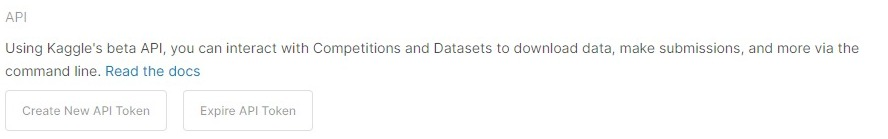

Setelah memilih "Create New API token" maka akan langsung tersimpan file dengan nama "kaggle.json"

--------------------------------------------------------------------------------

Install library kaggle dan import google library colab

In [ ]:
#upload library colab untuk upload file notebook
from google.colab import files

#install library kaggle
!pip install -q kaggle

Upload file API kaggle.json yang telah dibuat sebelumnya


In [ ]:
#upload API kaggle
upload = files.upload() 

Saving kaggle.json to kaggle.json


Download dataset dari kaggle
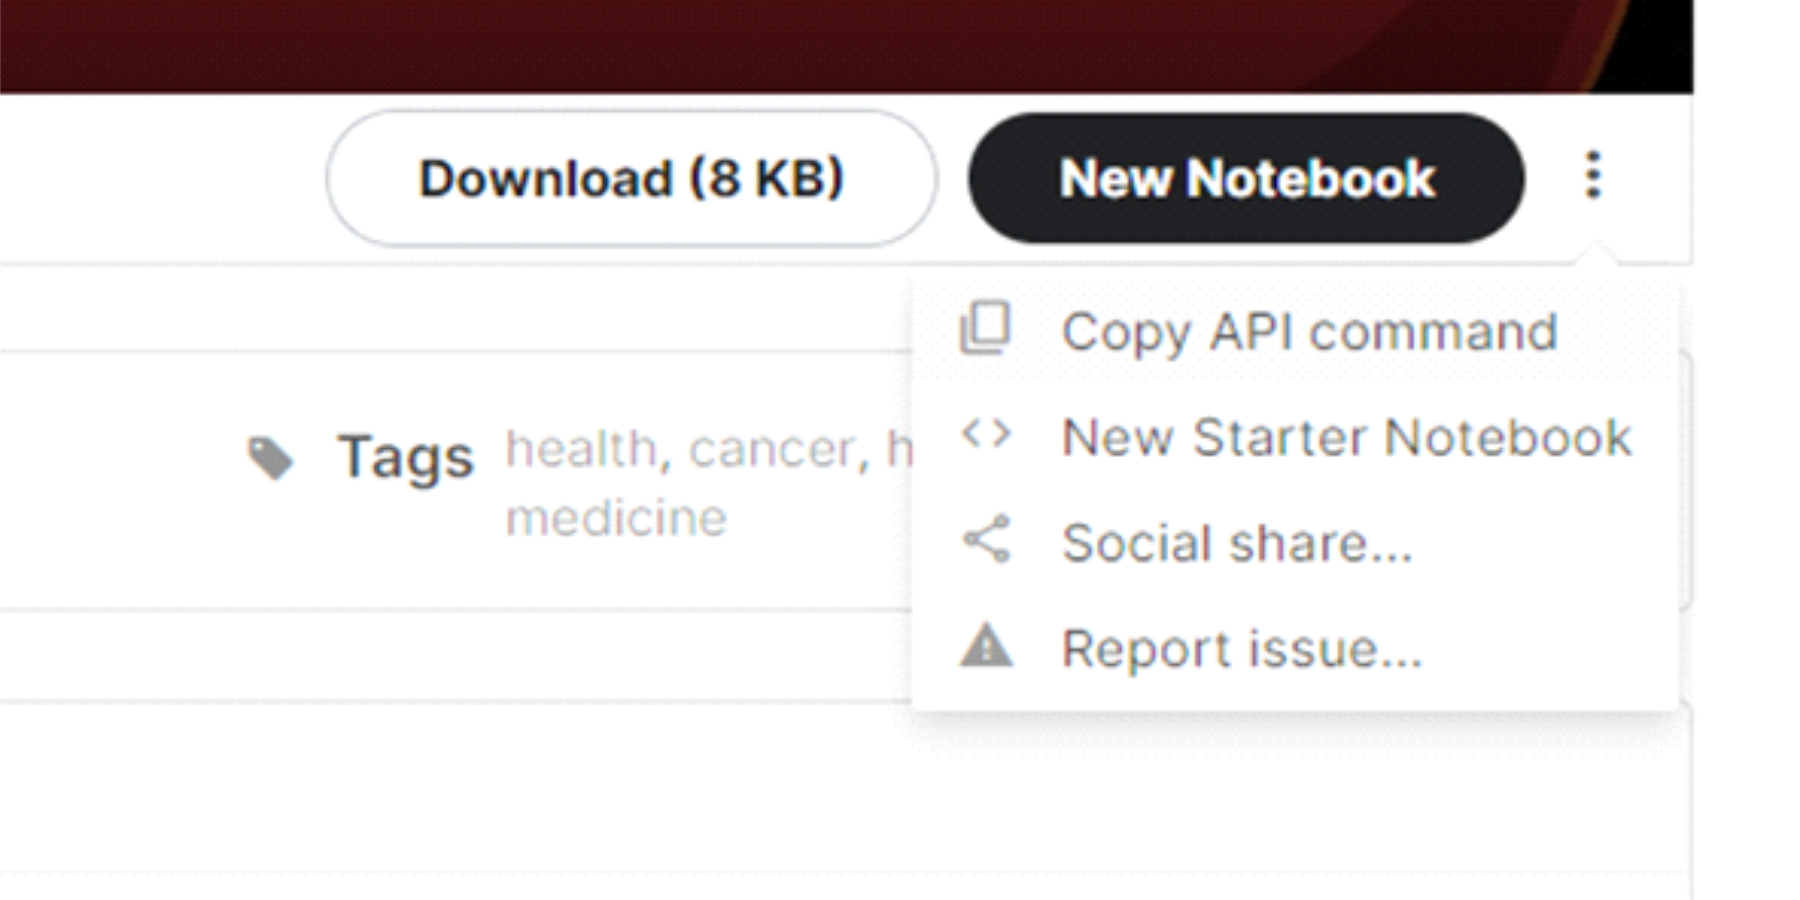


In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets list

ref                                                          title                                           size  lastUpdated          downloadCount  
-----------------------------------------------------------  ---------------------------------------------  -----  -------------------  -------------  
alexgude/california-traffic-collision-data-from-switrs       California Traffic Collision Data from SWITRS    1GB  2020-11-22 16:51:55           1687  
babyoda/women-entrepreneurship-and-labor-force               Women Entrepreneurship and Labor Force           1KB  2020-11-21 08:38:51           3976  
szymonjanowski/internet-articles-data-with-users-engagement  Internet news data with readers engagement       3MB  2020-11-21 17:09:57           1901  
sakshigoyal7/credit-card-customers                           Credit Card customers                          379KB  2020-11-19 07:38:44           7597  
imoore/2020-us-general-election-turnout-rates                2020 US General Election Tu

In [ ]:
!kaggle datasets download -d jeevannagaraj/indian-liver-patient-dataset

  0% 0.00/7.65k [00:00<?, ?B/s]
100% 7.65k/7.65k [00:00<00:00, 6.37MB/s]


In [34]:
import numpy as np
import pandas as pd
from pandas import plotting

import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('mall-customerscsv.zip', compression='zip', sep=',', quotechar='"')

In [35]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [36]:
df.size

1000

In [37]:
df.info

<bound method DataFrame.info of      CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


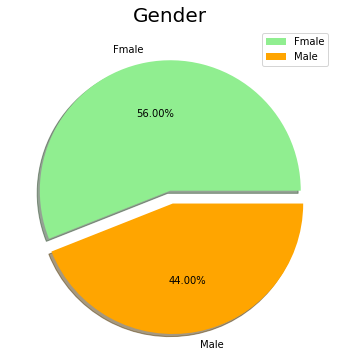

In [57]:
label = ['Fmale','Male']
size = df['Gender'].value_counts()
colors = ['lightgreen','orange']
explode = [0, 0.1]

plt.rcParams['figure.figsize']= (6, 6)
plt.pie(size, colors=colors, explode=explode, labels=label, shadow=True, autopct='%.2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


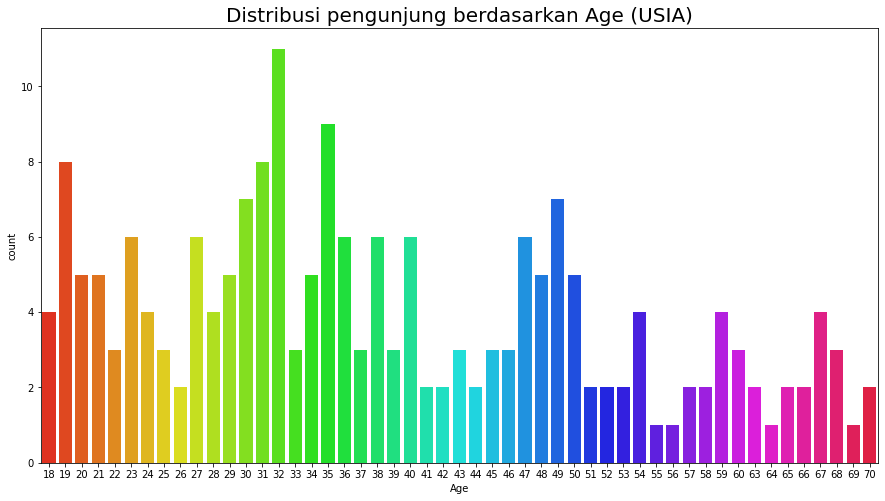

In [60]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.countplot(df['Age'], palette='hsv')
plt.title('Distribusi pengunjung berdasarkan Age (USIA)', fontsize=20)
plt.show()

In [72]:
x = df.iloc[:, [2, 4]].values

In [73]:
print(x.shape)

(200, 2)


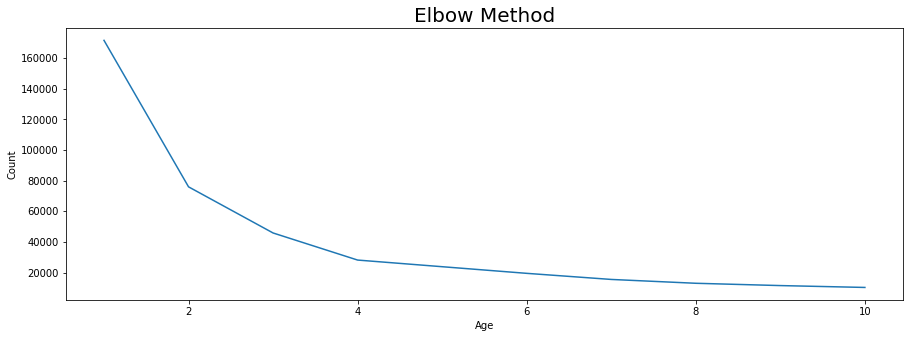

In [76]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
  km = KMeans(n_clusters = i, 
              init='k-means++', 
              max_iter=300,
              n_init = 10,
              random_state = 0
  )
  km.fit(x)
  wcss.append(km.inertia_)


plt.rcParams['figure.figsize'] = (15, 5)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method', fontsize=20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

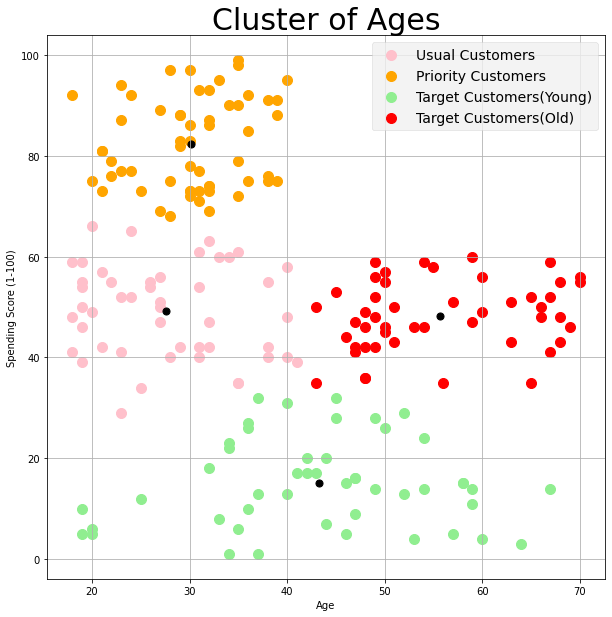

In [78]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)

ymeans = kmeans.fit_predict(x)

plt.rcParams['figure.figsize'] = (10, 10)
plt.title('Cluster of Ages', fontsize = 30)

plt.scatter(x[ymeans == 0, 0], x[ymeans == 0, 1], s = 100, c = 'pink', label = 'Usual Customers' )
plt.scatter(x[ymeans == 1, 0], x[ymeans == 1, 1], s = 100, c = 'orange', label = 'Priority Customers')
plt.scatter(x[ymeans == 2, 0], x[ymeans == 2, 1], s = 100, c = 'lightgreen', label = 'Target Customers(Young)')
plt.scatter(x[ymeans == 3, 0], x[ymeans == 3, 1], s = 100, c = 'red', label = 'Target Customers(Old)')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'black')

plt.style.use('fivethirtyeight')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid()
plt.show()